In [40]:
import numpy  as np
import matplotlib.pyplot as plt
import os 
import csv

In [44]:
carpeta=r"C:\Users\YaelSuarez\OneDrive - Karolinska Institutet\Documents\KI\Experiments\XRD\Biomineralization powder\Graph"
#Peak for normalization: start_c, end_d are the wavenumber points of start/end where the peak to normalize 
start_n = 10
end_n = 11

In [45]:
#Function for having x and y axis from document
def read_xrd(filename):
    with open(filename, 'r') as f:
        l=next(f)
        while l != "#Attenuator_coefficient=1.000000\n":
            l=next(f)
        reader=csv.reader(f,delimiter=" ")
        x=[]
        y=[]
        for row in reader:
            i = len(y)
            x.append(float(row[0]))
            y.append(float(row[1])) 
            y[i] = float(y[i]) - 0
    return np.array(x), np.array(y)

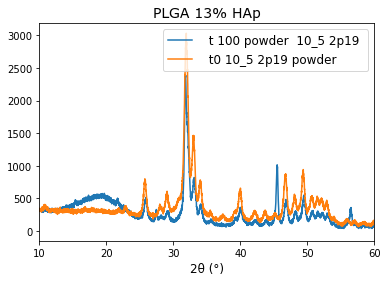

In [48]:
filenames = [os.path.join(carpeta,f) for f in os.listdir(carpeta) if f.endswith(".txt")]
all_x = []
all_y = []
for filename in filenames:
    x,y = read_xrd(filename)
    all_x.append(x.tolist())
    all_y.append(y.tolist())
    y_range = y[(x<end_n)&(x>start_n)]
    y_max_normal = max(y_range)

        #TO NORMALIZE
    #y_normal = [(i - min(y))/(y_max_normal - min(y)) for i in y]
        #TO REMOVE BACKGROUND
    y_normal = [(i - min(y)) for i in y]

    legend = filename.replace("_Theta_2-Theta.txt", " ")
    legend = legend.replace(carpeta, " ")
    legend = legend.replace(".txt", " ")
    legend = legend.replace("\\", " ")
    legend = legend.replace("t288", "")
    #all_labels.append(legend)
    plt.plot(x,y_normal, label = legend)
    plt.legend(loc='upper right',fontsize= 12, title_fontsize=12)
plt.title("PLGA 13% HAp",fontsize=14, fontname="verdana",loc='center')
plt.xlabel("2θ (°)", fontsize=12)
plt.xlim(10,80)
#plt.ylim(0,3)
#plt.yticks([])
plt.show()
    #To save figure
#fig.savefig(carpeta)